In [ ]:
# Husnain Sattar

In [2]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd
quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
names_of_company = ['HBL','ABL','UBL','BOP']

results = pd.DataFrame()

for names in names_of_company:
    x = quandl.get('PSX/%s' %names, start_date='2011-1-1',
    end_date='2022-5-1')
    x['company'] = names
    results = results.append(x)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\3288640232.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\3288640232.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\3288640232.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\3288640232.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)


# TurnOver Graph of each bank

<AxesSubplot:title={'center':'BOP'}, ylabel='TurnOver'>

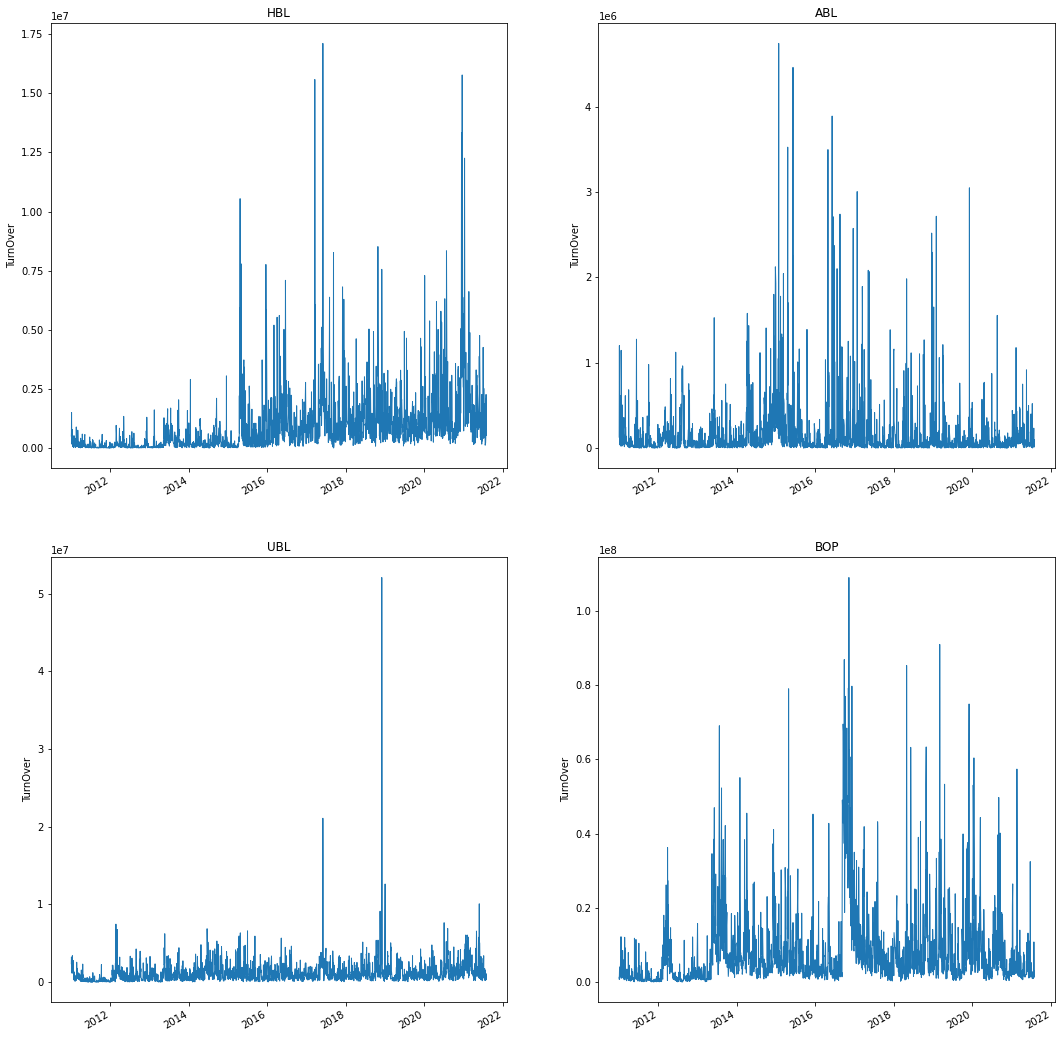

In [3]:
plt.figure(figsize=(18,20))
plt.subplot(2,2,1)
results[results['company']=='HBL'].Turnover.plot(kind='line',linewidth=1,markersize=5, xlabel="",ylabel="TurnOver",title="HBL")
plt.subplot(2,2,2)
results[results['company']=='ABL'].Turnover.plot(kind='line',linewidth=1,markersize=5, xlabel="",ylabel="TurnOver",title="ABL")
plt.subplot(2,2,3)
results[results['company']=='UBL'].Turnover.plot(kind='line',linewidth=1,markersize=5, xlabel="",ylabel="TurnOver",title="UBL")
plt.subplot(2,2,4)
results[results['company']=='BOP'].Turnover.plot(kind='line',linewidth=1,markersize=5, xlabel="",ylabel="TurnOver",title="BOP")


In [4]:
c=results['company']=='UBL'
ubl=results[c]
c=results['company']=='HBL'
hbl=results[c]
c=results['company']=='ABL'
abl=results[c]
c=results['company']=='BOP'
bop=results[c]
banks=[ubl,hbl,abl,bop]

In [4]:
price=[]
for k in range(0,len(banks)):
    temp=banks[k]
    for i in range(0,len(temp.index)):
        if i!=0:
            p=temp.iloc[i,0]-temp.iloc[i-1,4]
            price.append(p)
        else:
            price.append(0)
    temp=price
    banks[k]["Price Change"]=price
    price.clear()
    
    

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23372\2163984282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks[k]["Price Change"]=price
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23372\2163984282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks[k]["Price Change"]=price
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23372\2163984282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

# Price Change of each Bank 

KeyError: 'Price Change'

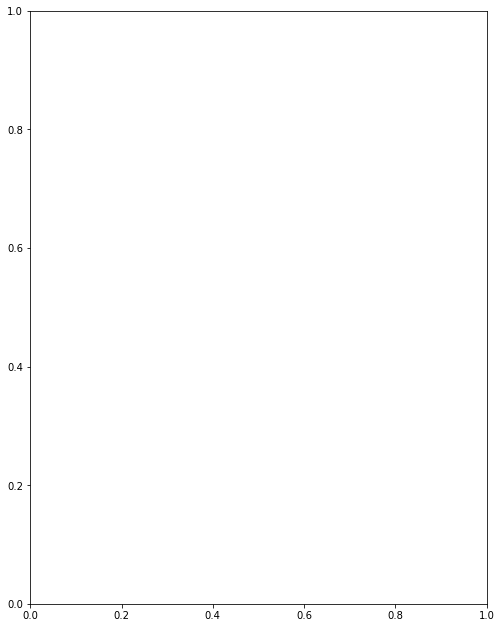

In [5]:
plt.figure(figsize=(18,24))
plt.subplot(2,2,1)
hbl['Price Change'].plot(ylabel="Price Change",title="HBL",linewidth=1)
plt.subplot(2,2,2)
abl['Price Change'].plot(ylabel="Price Change",title="ABL",linewidth=1)
plt.subplot(2,2,3)
ubl['Price Change'].plot(ylabel="Price Change",title="UBL",linewidth=1)
plt.subplot(2,2,4)
bop['Price Change'].plot(ylabel="Price Change",title="BOP",linewidth=1)

# Monthly Closing mean of each bank


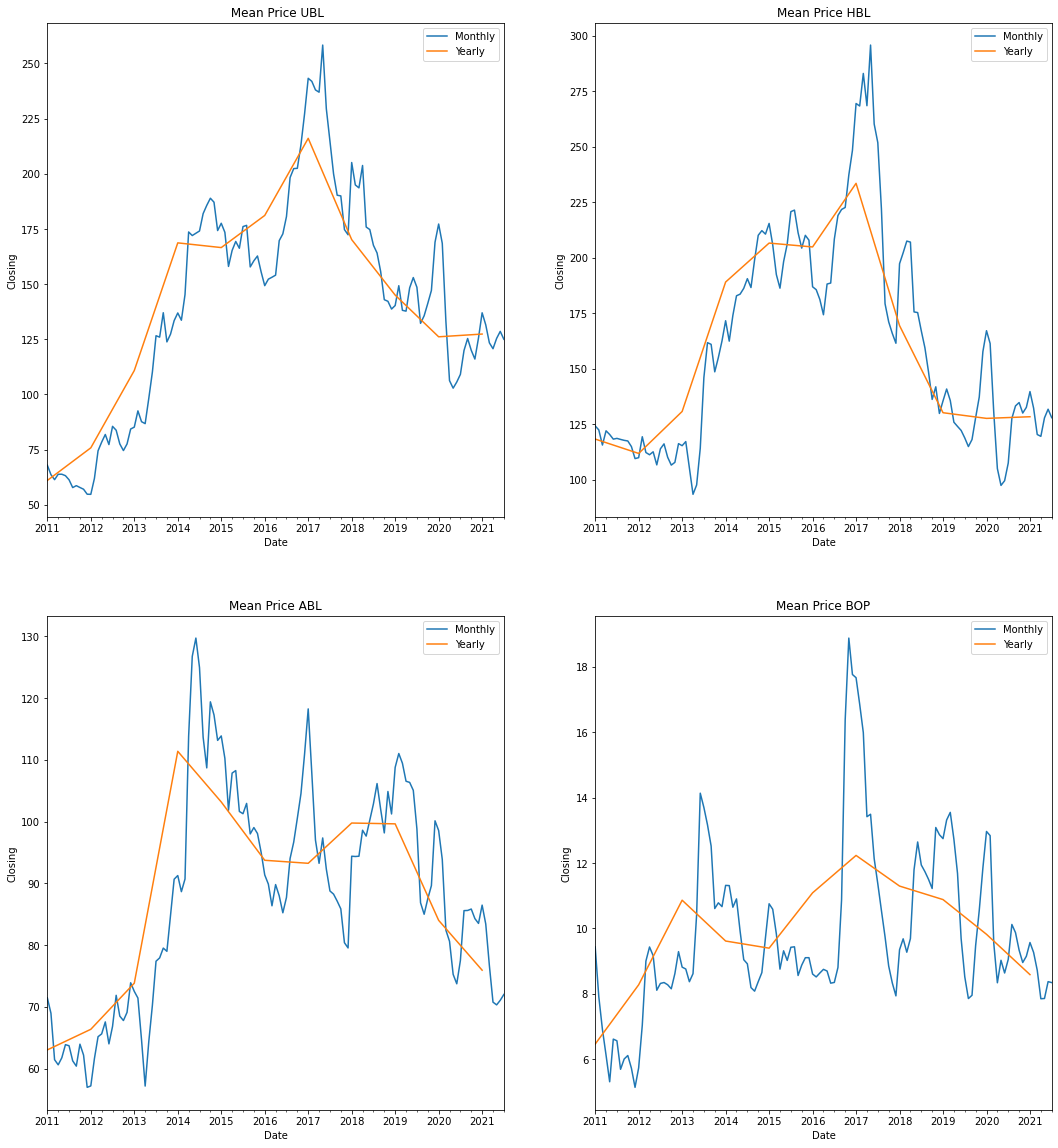

In [6]:
plt.figure(figsize=(18,20))
plt.subplot(2,2,1)
ubl.groupby(pd.PeriodIndex(ubl.index, freq="M"))['Close'].mean().plot(label="Monthly",ylabel="Closing")
ubl.groupby(pd.PeriodIndex(ubl.index, freq="Y"))['Close'].mean().plot(label="Yearly",title=" Mean Price UBL",ylabel="Closing")
plt.legend()

plt.subplot(2,2,2)
hbl.groupby(pd.PeriodIndex(hbl.index, freq="M"))['Close'].mean().plot(label="Monthly",ylabel="Closing")
hbl.groupby(pd.PeriodIndex(hbl.index, freq="Y"))['Close'].mean().plot(label="Yearly",title="Mean Price HBL",ylabel="Closing")
plt.legend()

plt.subplot(2,2,3)
abl.groupby(pd.PeriodIndex(abl.index, freq="M"))['Close'].mean().plot(label="Monthly",title="Monthly",ylabel="Closing")
abl.groupby(pd.PeriodIndex(abl.index, freq="Y"))['Close'].mean().plot(label="Yearly",title="Mean Price ABL",ylabel="Closing")
plt.legend()

plt.subplot(2,2,4)
bop.groupby(pd.PeriodIndex(bop.index, freq="M"))['Close'].mean().plot(label="Monthly",ylabel="Closing")
bop.groupby(pd.PeriodIndex(bop.index, freq="Y"))['Close'].mean().plot(label="Yearly",title="Mean Price BOP",ylabel="Closing")
plt.legend()


# Ploting the daily returns

In [7]:
price=[]
for k in range(0,len(banks)):
    temp=banks[k]
    for i in range(0,len(temp.index)):
        if i!=0:
            p=(temp.iloc[i-1,4]/temp.iloc[i,4])-1
            price.append(p)
        else:
            price.append(0)
    temp=price
    banks[k]["Daily Return"]=price
    price.clear()
    

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\1515038551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks[k]["Daily Return"]=price
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\1515038551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banks[k]["Daily Return"]=price
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16928\1515038551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

<AxesSubplot:title={'center':'BOP'}, xlabel='Date', ylabel='Daily Return'>

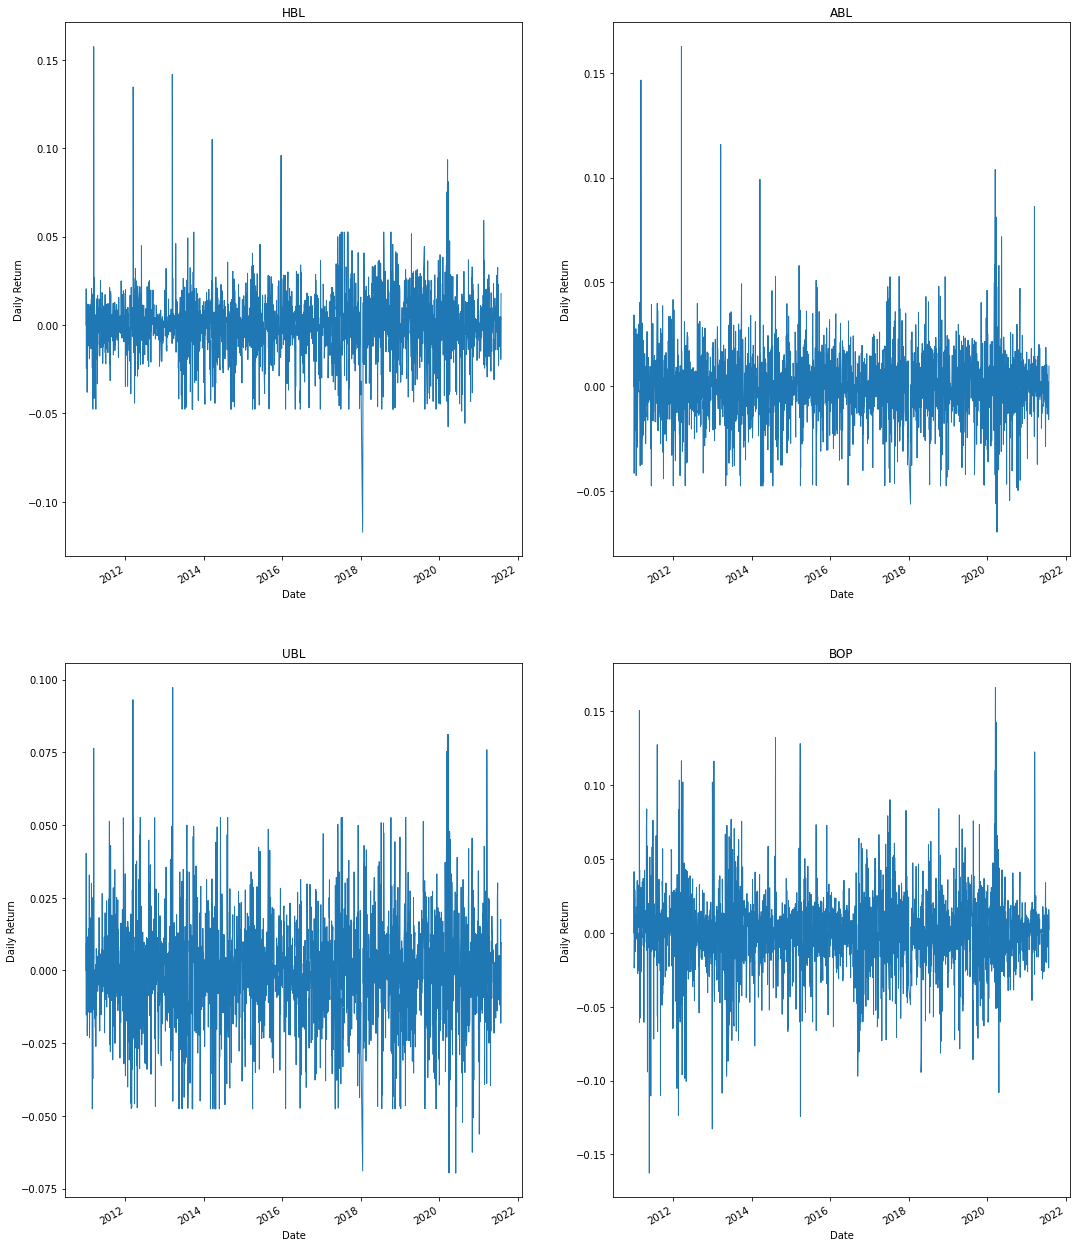

In [8]:
plt.figure(figsize=(18,24))
plt.subplot(2,2,1)
hbl['Daily Return'].plot(ylabel="Daily Return",title="HBL",linewidth=1)
plt.subplot(2,2,2)
abl['Daily Return'].plot(ylabel="Daily Return",title="ABL",linewidth=1)
plt.subplot(2,2,3)
ubl['Daily Return'].plot(ylabel="Daily Return",title="UBL",linewidth=1)
plt.subplot(2,2,4)
bop['Daily Return'].plot(ylabel="Daily Return",title="BOP",linewidth=1)

# Best and worst on single day return 

In [9]:
print("UBL have the best single day return on ",ubl["Daily Return"].idxmax()," and worst single day return on",ubl["Daily Return"].idxmin())
print("HBL have the best single day return on ",hbl["Daily Return"].idxmax()," and worst single day return on",hbl["Daily Return"].idxmin())
print("ABL have the best single day return on ",abl["Daily Return"].idxmax()," and worst single day return on",abl["Daily Return"].idxmin())
print("BOP have the best single day return on ",bop["Daily Return"].idxmax()," and worst single day return on",bop["Daily Return"].idxmin())


UBL have the best single day return on  2013-03-19 00:00:00  and worst single day return on 2020-06-03 00:00:00
HBL have the best single day return on  2011-03-15 00:00:00  and worst single day return on 2018-01-19 00:00:00
ABL have the best single day return on  2012-03-20 00:00:00  and worst single day return on 2020-04-03 00:00:00
BOP have the best single day return on  2020-03-19 00:00:00  and worst single day return on 2011-05-26 00:00:00


# Riskiest over entire period

Text(0, 0.5, 'Standard Deviation Risk')

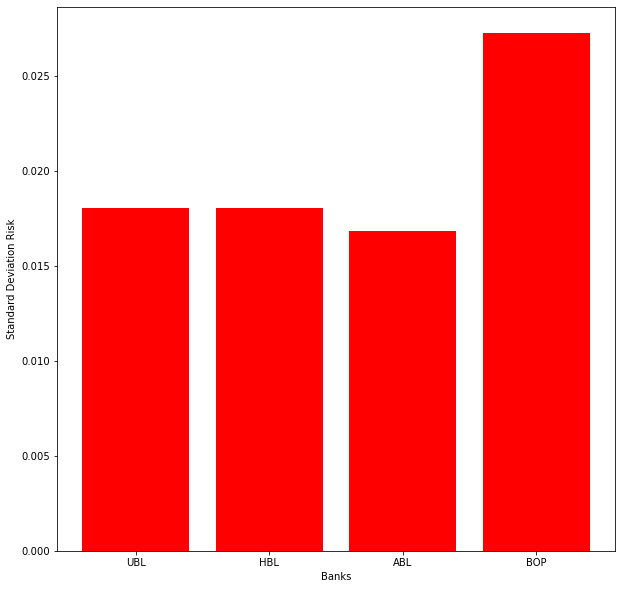

In [10]:
ublsd=ubl["Daily Return"].std()
hblsd=hbl["Daily Return"].std()
ablsd=abl["Daily Return"].std()
bopsd=bop["Daily Return"].std()
array=[ublsd,hblsd,ablsd,bopsd]
names=["UBL","HBL","ABL","BOP"]
plt.figure(figsize=(10,10))
plt.bar(names,array,color="red")
plt.xlabel("Banks")
plt.ylabel("Standard Deviation Risk")

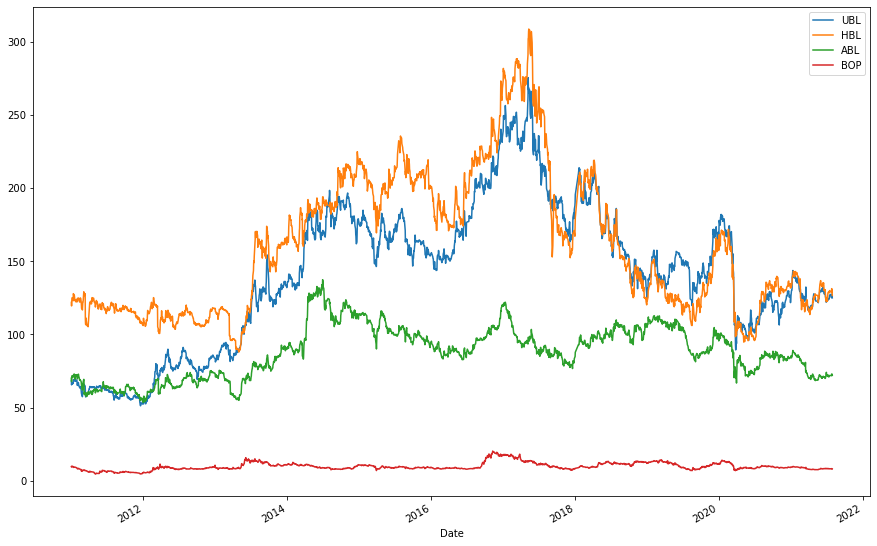

In [11]:
plt.figure(figsize=(15,10))
ubl.Close.plot(label="UBL")
hbl.Close.plot(label="HBL")
abl.Close.plot(label="ABL")
bop.Close.plot(label="BOP")
plt.legend()

Text(0, 0.5, 'Standard Deviation Risk')

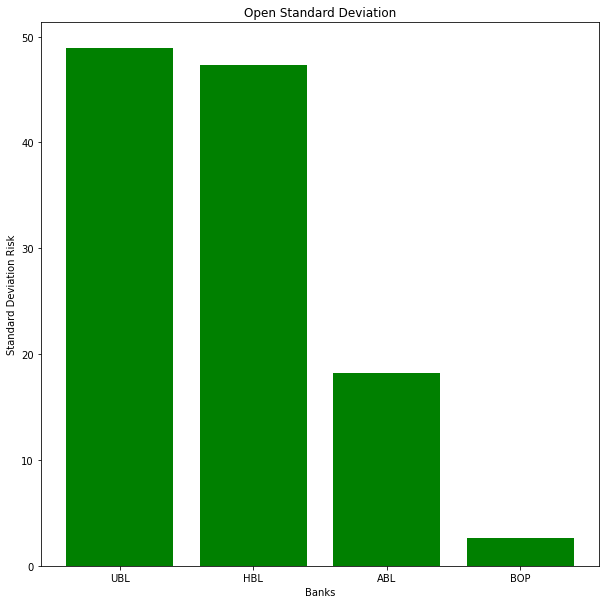

In [12]:
ublsd=ubl["Open"].std()
hblsd=hbl["Open"].std()
ablsd=abl["Open"].std()
bopsd=bop["Open"].std()
array=[ublsd,hblsd,ablsd,bopsd]
names=["UBL","HBL","ABL","BOP"]
plt.figure(figsize=(10,10))
plt.bar(names,array,color="green")
plt.title("Open Standard Deviation")
plt.xlabel("Banks")
plt.ylabel("Standard Deviation Risk")


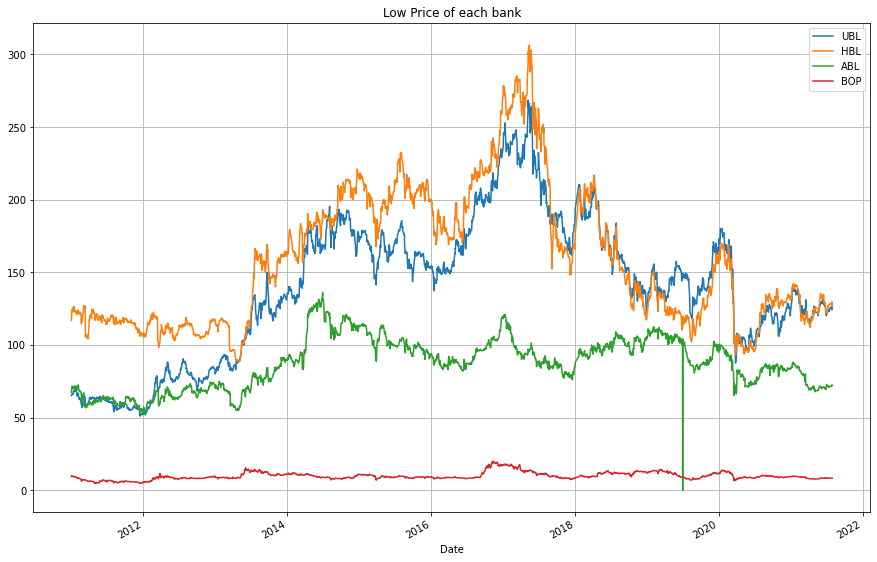

In [13]:
plt.figure(figsize=(15,10))
plt.title("Low Price of each bank")
ubl.Low.plot(label="UBL")
hbl.Low.plot(label="HBL")
abl.Low.plot(label="ABL")
bop.Low.plot(label="BOP")
plt.grid()
plt.legend()

<AxesSubplot:title={'center':'BOP'}>

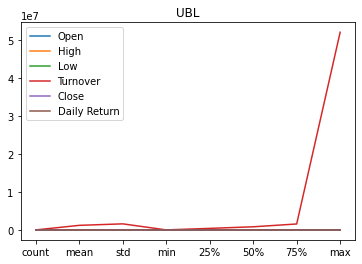

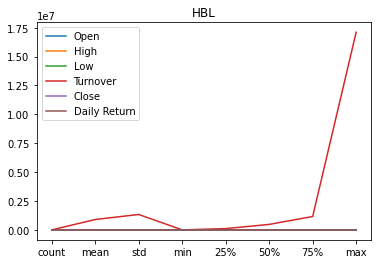

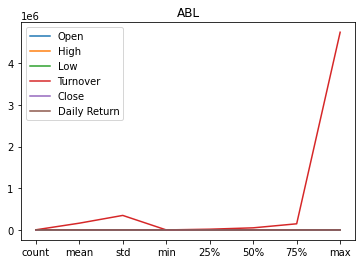

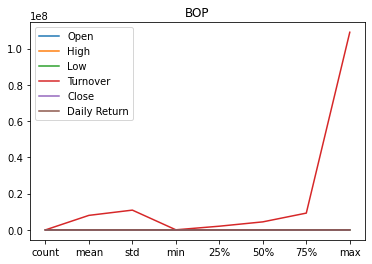

In [32]:
ubl.describe().plot(title="UBL")
hbl.describe().plot(title="HBL")
abl.describe().plot(title="ABL")
bop.describe().plot(title="BOP")